## Evolution of the representation and the dissimilarity matrice through learning with changing weights

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import torch.nn as nn
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output


from sklearn.manifold import Isomap

import sys
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Learning_dynamic/Experimental_setup")
from Experiment_v5 import Experiment
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Learning_dynamic/Training")
from Training_Networks_multi import Training
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Learning_dynamic/Analysis")
from Check import Checkup

sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Learning_dynamic/Analysis")
from Generate_data_activity_spatial_conceptual import Generate_Data
from Similarity_of_Neural_Network_Representations_Revisited import feature_space_linear_cka



In [2]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# def set_seed(seed=None, seed_torch=True):
#     if seed is None:
#         seed = np.random.choice(2 ** 32)
#     random.seed(seed)
#     np.random.seed(seed)
#     if seed_torch:
#         torch.manual_seed(seed)

#     print(f'Random seed {seed} has been set.')

# SEED = 2021
# set_seed(seed=SEED)


# G_SEED = torch.Generator()
# G_SEED.manual_seed(SEED)

import warnings
warnings.filterwarnings("ignore")

Device:  cpu


In [3]:
import warnings
warnings.filterwarnings("ignore")


# Multi

## Generate the Dataset

In [4]:
WIDTH = 100

BATCH_SIZE = 32

#set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=BATCH_SIZE,size_output_multi = 2)


dataset_train,dataset_space_train,dataset_weather_train,dataset_val,dataset_space_val,dataset_weather_val,dataset_test,dataset_space_test,dataset_weather_test= experiment.Generate_data()


train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_multi = torch.utils.data.DataLoader(dataset_test,batch_size=16,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

aaaaaa 19968
Test size dataset space torch.Size([999, 6])
Test size dataset weather torch.Size([999, 6])
Train size dataset space torch.Size([7000, 6])
Train size dataset weather torch.Size([7000, 6])


In [5]:
print(len(dataset_train))
print(len(dataset_val))
print(len(dataset_test))

7000
1999
999


In [6]:
Input_Dimension = 6
Nodes_Second = 4
Nodes_Third = 4
Output_Dimension = 2

do_analysis = True

# Train the Models

## Multi

In [7]:
ITERATION = 1

In [8]:
for count,(x_val,y_val) in enumerate(train_loader):
    if count < 2:
        print(x_val[0:3])

tensor([[0.6900, 0.0300, 0.1200, 0.5000, 0.8700, 1.0000],
        [0.4800, 0.1800, 0.4600, 0.0400, 0.4700, 1.0000],
        [0.6300, 0.7500, 0.5300, 0.9700, 0.5100, 1.0000]])
tensor([[0.3000, 0.2300, 0.5900, 0.3800, 0.5400, 0.0000],
        [0.1800, 0.1800, 0.8700, 0.0600, 0.8400, 0.0000],
        [0.7900, 0.4400, 0.4600, 0.6200, 0.2800, 0.0000]])


In [9]:
for count,(x_val,y_val) in enumerate(val_loader):
    if count < 2:
        print(x_val[0:3])

tensor([[0.3900, 0.6500, 0.6800, 0.2600, 0.3200, 1.0000],
        [0.4500, 0.9200, 0.2800, 0.4100, 0.3000, 1.0000],
        [0.1500, 0.6800, 0.1100, 0.6900, 0.5900, 1.0000]])
tensor([[0.4600, 0.0100, 0.9500, 0.6800, 0.4600, 0.0000],
        [0.6700, 0.9000, 0.3400, 0.0700, 0.2700, 0.0000],
        [0.7800, 0.5400, 0.6100, 0.7700, 0.0500, 0.0000]])


In [10]:
for count,(x_val,y_val) in enumerate(test_loader_multi):
    if count < 5:
        print(x_val[0:3])

tensor([[0.4600, 0.0900, 0.3300, 0.5100, 0.4900, 0.0000],
        [0.7100, 0.4800, 0.6900, 0.1100, 0.4600, 0.0000],
        [0.0600, 0.6600, 0.9800, 0.7100, 0.7100, 0.0000]])
tensor([[0.9100, 0.1000, 0.4700, 0.9200, 0.7900, 0.0000],
        [0.4400, 0.9700, 0.2500, 0.2200, 0.5000, 0.0000],
        [0.1200, 0.6400, 0.9900, 0.9600, 0.7300, 0.0000]])
tensor([[0.1300, 0.4500, 0.3300, 0.1700, 0.0900, 1.0000],
        [0.2000, 0.5900, 0.4400, 0.3000, 0.5900, 1.0000],
        [0.3600, 0.6900, 0.1300, 0.8900, 0.8500, 1.0000]])
tensor([[0.3600, 0.4300, 0.2600, 0.7600, 0.9000, 1.0000],
        [0.1000, 0.2300, 0.8000, 0.8700, 0.7500, 1.0000],
        [0.2200, 0.1600, 0.4600, 0.7400, 0.5700, 1.0000]])
tensor([[0.4800, 0.8100, 0.5800, 0.6200, 0.8500, 0.0000],
        [0.5600, 0.8100, 0.7500, 0.7100, 0.1700, 0.0000],
        [0.3900, 0.6400, 0.1100, 0.0300, 0.3700, 0.0000]])


In [11]:
print("----------------------")
for count,(x_val,y_val) in enumerate(train_loader):
    if count < 2:
        print(x_val.shape)
        print(x_val[0:3])
        print(y_val[0:3])
print("Size train loader:",count)
print("oooooo")
for count,(x_val,y_val) in enumerate(val_loader):
    if count < 2:
        print(x_val.shape)
        print(x_val[0:3])
print("Size val loader:",count)
print("oooooo")
for count,(x_val,y_val) in enumerate(test_loader_multi):
    if count < 5:
        print(x_val.shape)
        print(x_val[0:3])
print("Size test loader:",count)
print("----------------------")

----------------------
torch.Size([32, 6])
tensor([[0.6900, 0.0300, 0.1200, 0.5000, 0.8700, 1.0000],
        [0.4800, 0.1800, 0.4600, 0.0400, 0.4700, 1.0000],
        [0.6300, 0.7500, 0.5300, 0.9700, 0.5100, 1.0000]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
torch.Size([32, 6])
tensor([[0.3000, 0.2300, 0.5900, 0.3800, 0.5400, 0.0000],
        [0.1800, 0.1800, 0.8700, 0.0600, 0.8400, 0.0000],
        [0.7900, 0.4400, 0.4600, 0.6200, 0.2800, 0.0000]])
tensor([[1., 0.],
        [1., 0.],
        [0., 0.]])
Size train loader: 218
oooooo
torch.Size([32, 6])
tensor([[0.3900, 0.6500, 0.6800, 0.2600, 0.3200, 1.0000],
        [0.4500, 0.9200, 0.2800, 0.4100, 0.3000, 1.0000],
        [0.1500, 0.6800, 0.1100, 0.6900, 0.5900, 1.0000]])
torch.Size([32, 6])
tensor([[0.4600, 0.0100, 0.9500, 0.6800, 0.4600, 0.0000],
        [0.6700, 0.9000, 0.3400, 0.0700, 0.2700, 0.0000],
        [0.7800, 0.5400, 0.6100, 0.7700, 0.0500, 0.0000]])
Size val loader: 62
oooooo
torch.Size([16, 6])
tensor([[0

In [13]:
EPOCH = 2
Multi_losses = []
for i in range(ITERATION):
    training = Training()
    model,val_losses = training.training_multi(Input_Dimension,Nodes_Second,Nodes_Third,Output_Dimension,EPOCH,train_loader,val_loader,test_loader_multi,do_analysis)
    Multi_losses.append(val_losses)

X:batch
tensor([[0.6900, 0.0300, 0.1200, 0.5000, 0.8700, 1.0000],
        [0.4800, 0.1800, 0.4600, 0.0400, 0.4700, 1.0000],
        [0.6300, 0.7500, 0.5300, 0.9700, 0.5100, 1.0000],
        [0.2900, 0.9100, 0.4500, 0.3500, 0.5100, 1.0000],
        [0.2100, 0.4100, 0.1800, 0.9000, 0.9300, 1.0000],
        [0.9400, 0.6700, 0.3700, 0.4600, 0.1500, 1.0000],
        [0.5600, 0.9600, 0.1300, 0.2600, 0.8300, 1.0000],
        [0.3200, 0.8700, 0.0500, 0.7500, 0.9100, 1.0000],
        [0.1100, 0.7900, 0.8500, 0.7500, 0.5100, 1.0000],
        [0.3100, 0.3000, 0.1900, 0.9800, 0.6600, 1.0000]])
X:batch
tensor([[0.3000, 0.2300, 0.5900, 0.3800, 0.5400, 0.0000],
        [0.1800, 0.1800, 0.8700, 0.0600, 0.8400, 0.0000],
        [0.7900, 0.4400, 0.4600, 0.6200, 0.2800, 0.0000],
        [0.2700, 0.2900, 0.7700, 0.7300, 0.0000, 0.0000],
        [0.7500, 0.5000, 0.3400, 0.8800, 0.4800, 0.0000],
        [0.7600, 0.7000, 0.8500, 0.8200, 0.5900, 0.0000],
        [0.0700, 0.9800, 0.9500, 0.4900, 0.8300, 0.0000

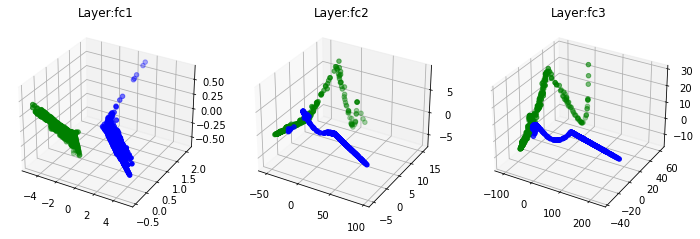

In [ ]:
Names_hook = ["fc1","fc2","fc3"]
generate_data = Generate_Data(model,test_loader_multi)
activity_layer,Liste_seed = generate_data.generate_preprocessed_data(multi = False)
color_map = ["green"if i==0 else "blue" for i in Liste_seed ]
fig = plt.figure(figsize=(12,10))
for layer in range(len(Names_hook)):
    ax = fig.add_subplot(1,3,layer+1,projection='3d')
    embedding = Isomap(n_neighbors=20,n_components=3)
    X = embedding.fit_transform(activity_layer[layer])
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=color_map)
    plt.title("Layer:"+str(Names_hook[layer]))

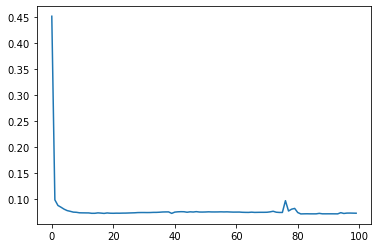

In [ ]:
epochs = [i for i in range(len(Multi_losses[0]))]
plt.figure()
for i in range(ITERATION):
    plt.plot(Multi_losses[i])

In [ ]:
for x_test,y_test in test_loader_multi:
    print(x_test.shape)
    with torch.no_grad():
        yhat = torch.nn.Sigmoid()(model(x_test))
        print(y_test)
        print(yhat)

torch.Size([16, 6])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1.6159e-04, 4.9894e-16],
        [2.8369e-04, 1.5231e-18],
        [4.4751e-14, 1.4754e-17],
        [7.5704e-11, 4.0999e-15],
        [3.4913e-31, 3.6920e-17],
        [9.1749e-19, 8.6263e-17],
        [9.9996e-01, 1.8004e-14],
        [7.9700e-12, 4.3508e-16],
        [3.2698e-04, 2.2740e-19],
        [3.5640e-04, 9.4412e-20],
        [4.3003e-22, 3.6211e-14],
        [2.4632e-03, 1.0249e-14],
        [1.6983e-04, 3.7834e-16],
        [5.7355e-30, 4.0680e-17],
        [1.8484e-27, 6.5514e-16],
        [2.3746e-04, 7.2278e-18]])
torch.Size([16, 6])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],


In [ ]:
print(x_test.shape)

torch.Size([7, 6])
